In [267]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [268]:
df=pd.read_csv("Jamboree.csv")

In [269]:
df.columns=df.columns.str.replace(' ','')

In [270]:
df.drop('SerialNo.', axis = 1, inplace = True)

In [271]:
df.isnull().sum()

,0
GREScore,0
TOEFLScore,0
UniversityRating,0
SOP,0
LOR,0
CGPA,0
Research,0
ChanceofAdmit,0


In [272]:
df.head()

,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research,ChanceofAdmit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [273]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GREScore          500 non-null    int64  
 1   TOEFLScore        500 non-null    int64  
 2   UniversityRating  500 non-null    int64  
 3   SOP               500 non-null    float64
 4   LOR               500 non-null    float64
 5   CGPA              500 non-null    float64
 6   Research          500 non-null    int64  
 7   ChanceofAdmit     500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [274]:
df.shape

(500, 8)

In [275]:
df.describe()

,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research,ChanceofAdmit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


<Axes: >

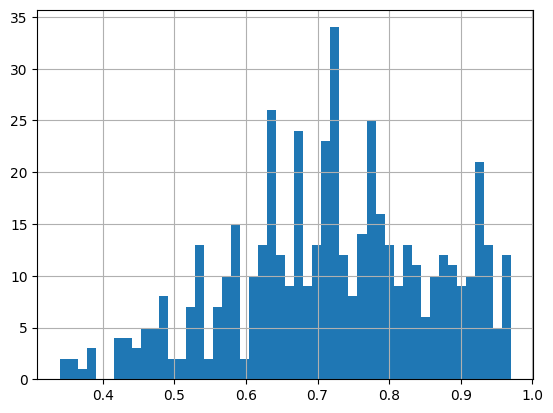

In [276]:
df['ChanceofAdmit'].hist(bins=50)

<Axes: >

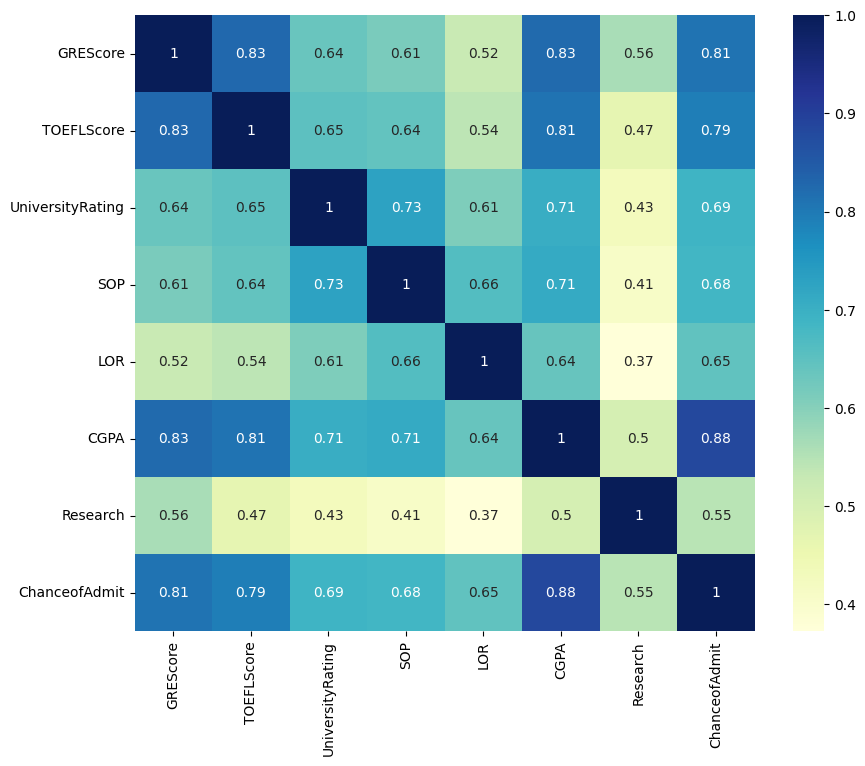

In [277]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

Here we can see that GRE and TOEFL score plays an equal important role in admission of the candidate. Also the CGPA matters a lot.

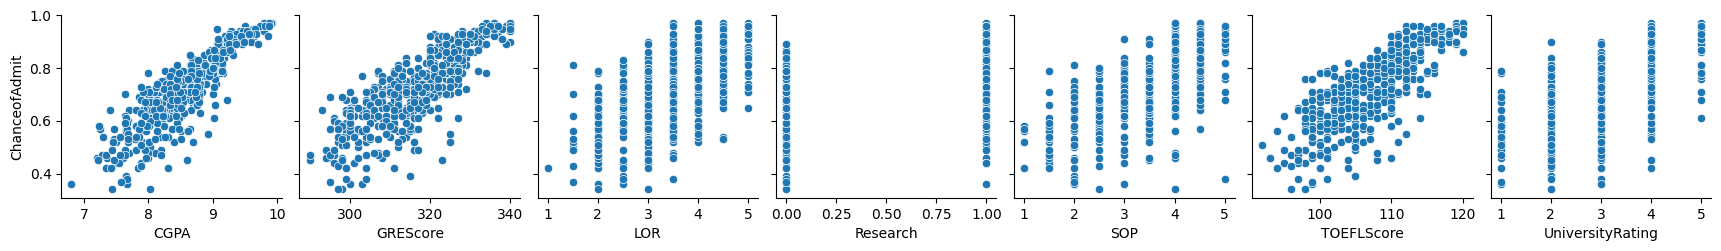

In [278]:
sns.pairplot(df,x_vars=df.columns.difference(['ChanceofAdmit']), y_vars=["ChanceofAdmit"],kind='scatter')

lets understand the relation between various factors influencing admission.

Text(0.5, 1.0, 'GRE score vs TOEFL Score')

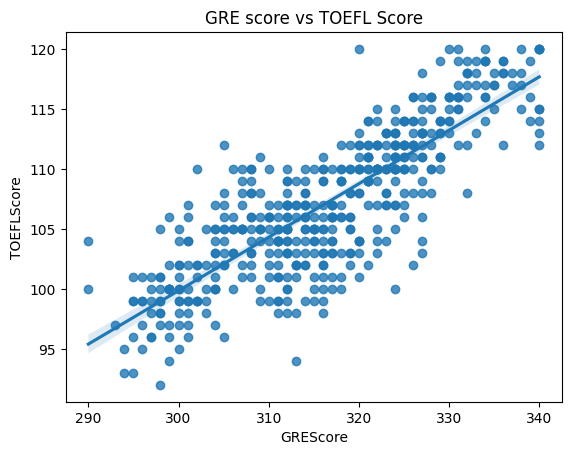

In [279]:
sns.regplot(x='GREScore',y='TOEFLScore', data=df)
plt.title ("GRE score vs TOEFL Score")

Here we can see that people having high GRE score also tend to have high TOEFL score as they are similar kind of exam.

Text(0.5, 1.0, 'GRE Score vs CGPA')

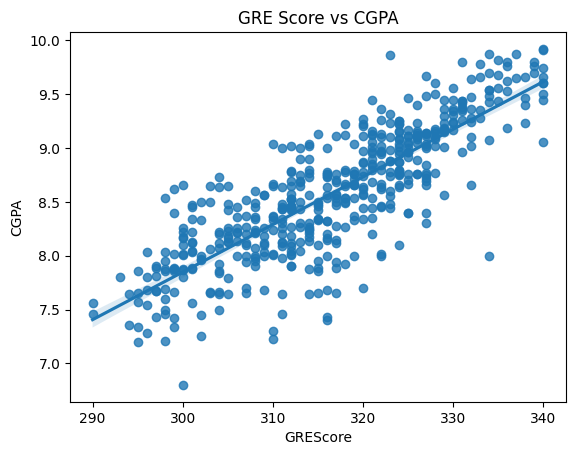

In [280]:
sns.regplot(x="GREScore", y="CGPA", data=df)
plt.title("GRE Score vs CGPA")

Here GREScore is also more for people having higher CGPA as they have strong academics background.

<Axes: xlabel='CGPA', ylabel='LOR'>

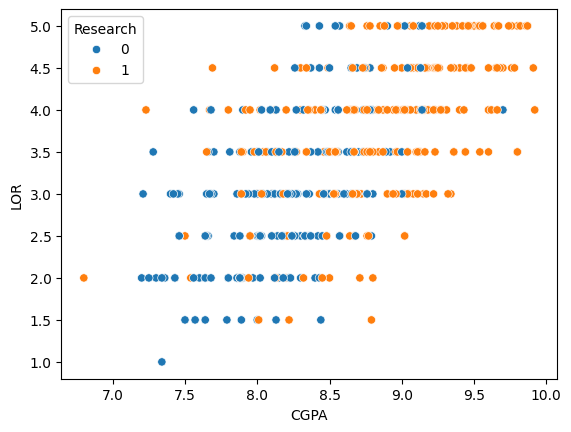

In [281]:
sns.scatterplot(x='CGPA',y='LOR',data=df,hue='Research')

Here we can see that people having Research experience have high LOR rating than those who doesn't have research even though they have a good CGPA.

Let's just start splitting the data before training.

In [282]:
from sklearn.model_selection import train_test_split

X=df.drop('ChanceofAdmit', axis=1)
y=df['ChanceofAdmit']

In [283]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,shuffle=True)

We have splitted our data into training and testing, with testing size of 20%

In [284]:
#Standardization
from sklearn.preprocessing import StandardScaler
X_train_columns=X_train.columns
std=StandardScaler()
X_train_std=std.fit_transform(X_train)

In [285]:
X_train_std

array([[ 1.23170322e+00,  1.40575313e+00,  1.63459766e+00, ...,
         5.36050750e-01,  1.09857892e+00,  8.90910755e-01],
       [-1.63929846e+00, -1.52799253e+00, -9.94781954e-01, ...,
        -5.33377180e-01, -9.19796782e-01, -1.12244688e+00],
       [-2.33529887e+00, -1.20202079e+00, -1.87124182e+00, ...,
        -1.60280511e+00, -1.69104604e+00, -1.12244688e+00],
       ...,
       [ 2.74702662e-01,  4.27837908e-01, -9.94781954e-01, ...,
         1.33678491e-03, -5.00901776e-02, -1.12244688e+00],
       [-4.21297748e-01, -2.24105571e-01, -1.18322083e-01, ...,
         1.60547868e+00, -3.36806190e-02, -1.12244688e+00],
       [-1.81329857e+00, -1.36500666e+00, -9.94781954e-01, ...,
        -1.06809114e+00, -9.19796782e-01, -1.12244688e+00]])

In [286]:
X_train=pd.DataFrame(X_train_std,columns=X_train_columns)

In [287]:
X_train

,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research
0,1.231703,1.405753,1.634598,0.596760,0.536051,1.098579,0.890911
1,-1.639298,-1.527993,-0.994782,0.596760,-0.533377,-0.919797,-1.122447
2,-2.335299,-1.202021,-1.871242,-1.986616,-1.602805,-1.691046,-1.122447
3,0.448703,1.079781,1.634598,1.113435,0.536051,0.573473,0.890911
4,0.622703,-0.387091,-0.118322,-0.436590,0.536051,0.261691,-1.122447
...,...,...,...,...,...,...,...
395,1.492703,1.405753,0.758138,0.596760,-0.533377,-0.969025,0.890911
396,1.318703,1.731725,-0.994782,1.113435,0.001337,1.262675,0.890911
397,0.274703,0.427838,-0.994782,0.596760,0.001337,-0.050090,-1.122447
398,-0.421298,-0.224106,-0.118322,-0.436590,1.605479,-0.033681,-1.122447


In [288]:
X_test_std=std.transform(X_test)


In [289]:
X_test=pd.DataFrame(X_test_std,columns=X_train_columns)

In [290]:
# Now Training our model on various regressions.
from sklearn.linear_model import Lasso,Ridge,LinearRegression
from sklearn.metrics import mean_squared_error
models=[['Linear Regression:',LinearRegression()],['Lasso Regression:',Lasso(alpha=0.01)],['Ridge Regression:',Ridge(alpha=1.001)]]


In [291]:
for name,model in models:
  model.fit(X_train,y_train)
  predictions = model.predict(X_test)
  print(name,'Error', (np.sqrt(mean_squared_error(y_test, predictions))))
  print(name,'coefficients',model.coef_)
  print(name,'intercept',model.intercept_)


Linear Regression: Error 0.051011198848470524
Linear Regression: coefficients [ 0.02008455  0.01768348  0.00535806 -0.00151696  0.01470765  0.07633329
  0.0135192 ]
Linear Regression: intercept 0.7231499999999998
Lasso Regression: Error 0.05254706908853664
Lasso Regression: coefficients [0.01929753 0.01390083 0.00244786 0.         0.00948995 0.07710598
 0.00796865]
Lasso Regression: intercept 0.7231499999999998
Ridge Regression: Error 0.05094163613504678
Ridge Regression: coefficients [ 0.02030654  0.01781669  0.00546766 -0.00135751  0.01475681  0.07563922
  0.01351377]
Ridge Regression: intercept 0.7231499999999998


Here we have observed the models error with their trained coefficients and intercept.

In [292]:
model1=LinearRegression()
model1.fit(X_train,y_train)
y_pred=model1.predict(X_test)

Now checking Linear regression Assumptions.


In [293]:
# Mean of Residuals
residuals = y_test.values-pred # actual values - predicted values
mean_residuals = np.mean(residuals)
print("Mean of Residuals :".format(mean_residuals))

Mean of Residuals :


Test for Homoscedasticity

Text(0.5, 1.0, 'Residuals vs fitted values plot for homoscedasticity check')

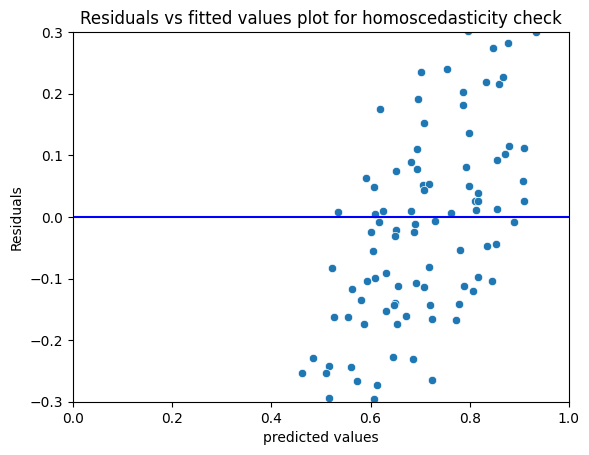

In [300]:
sns.scatterplot(x=y_pred,y=residuals)
plt.xlabel('predicted values')
plt.ylabel('Residuals')
plt.ylim(-0.3,0.3)
plt.xlim(0,1)
sns.lineplot(x=[0,26], y=[0,0], color='blue')
plt.title('Residuals vs fitted values plot for homoscedasticity check')

Normality of residuals

<ipython-input-303-a99032cb1f38>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals,kde=True)


Text(0.5, 1.0, 'Normality of error terms/residuals')

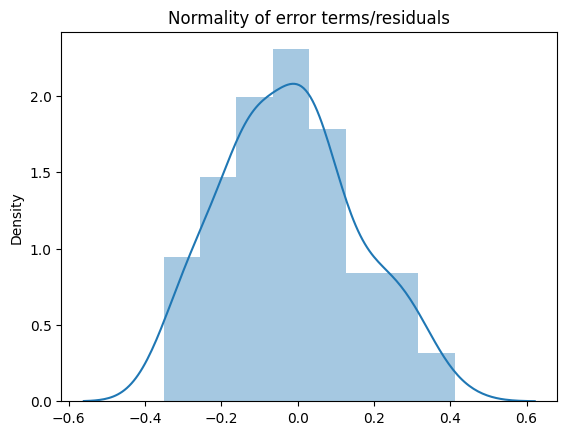

In [303]:
sns.distplot(residuals,kde=True)
plt.title('Normality of error terms/residuals')

Text(0, 0.5, 'y_pred')

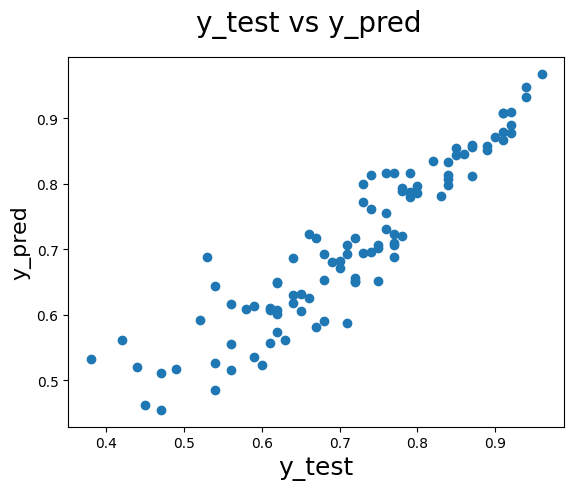

In [305]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test.values, y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)